<a href="https://colab.research.google.com/github/hpatryck/Processamento-Digital-de-Imagem/blob/main/Atividade_4_Detec%C3%A7%C3%A3o_de_linhas_e_c%C3%ADrculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
print("OpenCV-Python Version {}".format(cv2.__version__))

from google.colab import drive
drive.mount('/content/drive')

OpenCV-Python Version 4.10.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


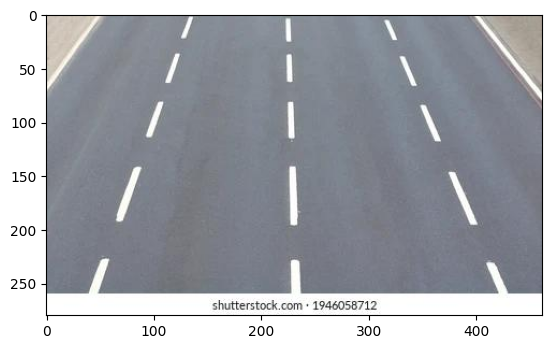

In [ ]:
image = io.imread(r'/content/drive/MyDrive/Colab Notebooks/estrada.jpg')

io.imsave('estrada.jpg', image)

# loading the image from the disk
image = cv2.imread('estrada.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

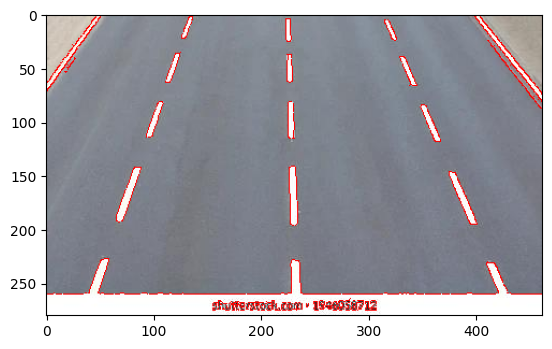

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 50, 200, 3)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 2, minLineLength=0, maxLineGap=0)

line_image = np.copy(image)

if lines is not None:
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(line_image)
plt.show()

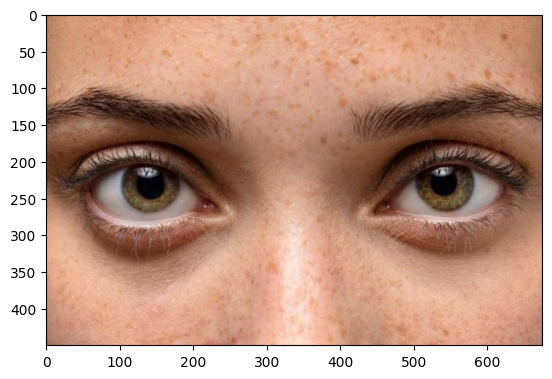

In [ ]:
eye_image = io.imread(r'/content/drive/MyDrive/Colab Notebooks/olhos.jpg')

io.imsave('olhos.jpg', eye_image)

# loading the image from the disk
eye_image = cv2.imread('olhos.jpg')
eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)

plt.imshow(eye_image)
plt.show()

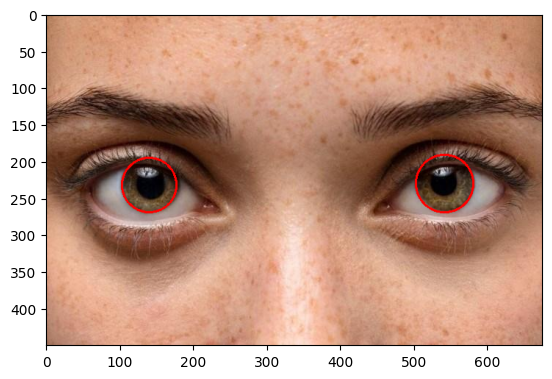

In [ ]:
gray = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=20, maxRadius=40)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(eye_image, center, radius, (255, 0, 0), 2)

plt.imshow(eye_image)
plt.show()